In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
#from sklearn import manifold, datasets
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [130]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [142]:
#X = unpickle("data/partitioned_features.pickle")
X = np.load("x_feature_arima.npy")
X.shape
#X = np.random.rand(413,75)

FileNotFoundError: [Errno 2] No such file or directory: 'x_feature_arima.npy'

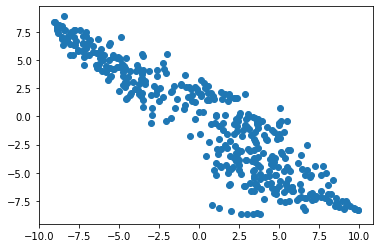

array([[-7.86280441e+00,  5.45243120e+00],
       [-8.48099613e+00,  6.31607056e+00],
       [-5.82268381e+00,  3.93499970e+00],
       [ 4.81054306e+00, -5.21658373e+00],
       [ 8.74923801e+00, -8.05329609e+00],
       [-3.02073812e+00, -5.69475114e-01],
       [ 3.36275268e+00, -4.81536484e+00],
       [ 5.30688095e+00, -6.66711378e+00],
       [ 2.93847990e+00, -3.84838772e+00],
       [ 9.34199274e-01,  1.52857423e+00],
       [ 4.26331902e+00, -2.13747239e+00],
       [ 2.33895922e+00,  1.60239506e+00],
       [ 2.23423457e+00,  1.65320635e+00],
       [ 3.76906061e+00, -5.57255936e+00],
       [ 4.92194319e+00, -4.46882391e+00],
       [ 3.54854059e+00, -5.97010946e+00],
       [-1.71306705e+00,  2.23455644e+00],
       [ 3.67409563e+00, -7.02554464e-01],
       [ 2.42140698e+00, -3.01940322e+00],
       [-2.40840054e+00,  2.49066281e+00],
       [-6.05015707e+00,  4.03993511e+00],
       [ 3.58734083e+00, -8.57044125e+00],
       [-1.78133464e+00,  2.14659238e+00],
       [-5.

In [141]:
#X_embedded = TSNE(n_components=1, perplexity=100).fit_transform(X[0])
#here I do cluster on the datas that are labeled zero, cluster the whole set, find the centroid, and make a circle 
#to include 85% of the data and put less weights on the data that is outside it
Kmean = KMeans(n_clusters=1).fit(X)
center = Kmean.cluster_centers_

#dist = numpy.linalg.norm(a-b)
X_embedded = TSNE(n_components=2, perplexity=100).fit_transform(X)

plt.scatter(X_embedded.transpose()[0], X_embedded.transpose()[1])
#plt.plot(X_embedded)
plt.show()
X_embedded

In [140]:
pca = PCA(n_components=10)
decomposed_X=pca.fit_transform(X)
#decomposed_X
X_concatenate = np.concatenate((decomposed_X, X_embedded), axis=1)
X_concatenate

array([[ 2.87950460e+02,  8.16965342e+01, -1.11445801e+02, ...,
        -2.34729681e+00, -1.04331684e+01,  2.89870739e+00],
       [ 3.90738509e+02,  1.16608324e+02, -1.01805219e+02, ...,
        -2.14080970e+00, -1.13707571e+01,  3.11261177e+00],
       [ 1.81593365e+02, -2.45481458e+01,  5.71095025e+01, ...,
         1.13161686e+01, -7.93922424e+00,  1.91662586e+00],
       ...,
       [ 6.15554422e+02,  1.62079928e+02,  9.05575076e+00, ...,
         1.53307618e+01, -1.25314741e+01,  3.97951031e+00],
       [ 2.23024611e+02,  2.76482426e+01, -2.94014863e+01, ...,
        -1.15545088e+01, -9.61809063e+00,  2.43811560e+00],
       [ 1.82426996e+02, -9.73928674e+01,  2.55781755e+02, ...,
        -8.76761613e+00, -6.58786583e+00,  4.83322442e-02]])